In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['age', 'fare']],
    df['survived'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((623, 2), (268, 2))

In [3]:
ort=X_train.mean().to_dict()
X_train.fillna(ort,inplace=True)
X_test.fillna(ort,inplace=True)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

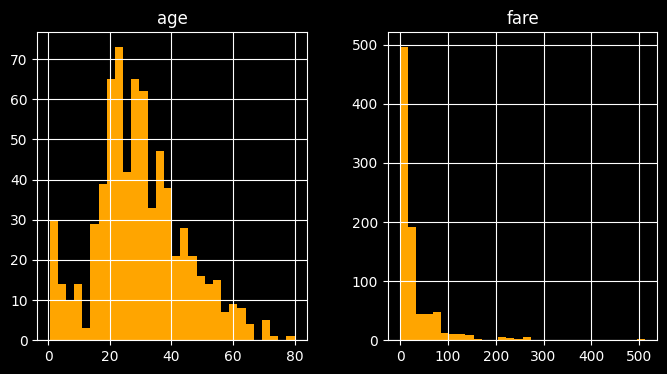

In [4]:
plt.style.use("dark_background")
df[["age","fare"]].hist(bins=30,color="orange",figsize=(8,4))

In [7]:
age_range=X_train["age"].agg(lambda x:x.max()-x.min())
age_range

79.33

In [6]:
np.floor(age_range)

79.0

In [9]:
min_val=int(np.floor(X_train["age"].min()))
max_val = int(np.floor(X_train["age"].max()))

inter_value = int(np.round(age_range)/10)
min_val, max_val, inter_value

(0, 80, 7)

In [10]:
intervals = [i for i in range(min_val,max_val + inter_value,inter_value)]
intervals

[0, 7, 14, 21, 28, 35, 42, 49, 56, 63, 70, 77, 84]

In [13]:
len(intervals)

13

In [63]:
labels = ["Bin_" + str(i) for i in range(1,len(intervals))]
labels

['Bin_1',
 'Bin_2',
 'Bin_3',
 'Bin_4',
 'Bin_5',
 'Bin_6',
 'Bin_7',
 'Bin_8',
 'Bin_9',
 'Bin_10',
 'Bin_11',
 'Bin_12']

In [64]:
X_train["Age_disc_labels"] = pd.cut(x=X_train["age"],bins=intervals,labels=labels,include_lowest=True)

X_train["age_disc"] = pd.cut(x=X_train["age"],bins=intervals,include_lowest=True)
X_train.head()

,age,fare,Age_disc_labels,age_disc
857,51.000000,26.5500,Bin_8,"(49.0, 56.0]"
52,49.000000,76.7292,Bin_7,"(42.0, 49.0]"
386,1.000000,46.9000,Bin_1,"(-0.001, 7.0]"
124,54.000000,77.2875,Bin_8,"(49.0, 56.0]"
578,29.915339,14.4583,Bin_5,"(28.0, 35.0]"


In [15]:
X_train["age_disc"].value_counts()

age_disc
(28.0, 35.0]     218
(21.0, 28.0]     106
(14.0, 21.0]      85
(35.0, 42.0]      72
(42.0, 49.0]      39
(-0.001, 7.0]     36
(49.0, 56.0]      25
(7.0, 14.0]       17
(56.0, 63.0]      16
(63.0, 70.0]       5
(70.0, 77.0]       3
(77.0, 84.0]       1
Name: count, dtype: int64

<Axes: xlabel='age_disc'>

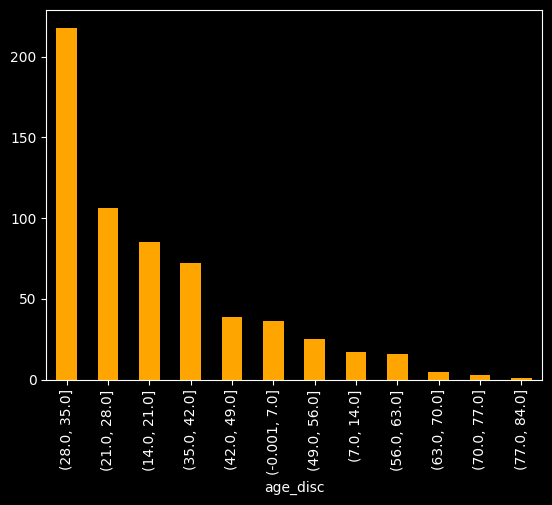

In [16]:
X_train["age_disc"].value_counts().plot.bar(color = "orange")

In [17]:
from sklearn.preprocessing import KBinsDiscretizer
from feature_engine.discretisation import EqualWidthDiscretiser

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['age', 'fare']],
    df['survived'],
    test_size=0.3,
    random_state=0)

ort=X_train.mean().to_dict()
X_train.fillna(ort,inplace=True)
X_test.fillna(ort,inplace=True)

In [70]:
disc = KBinsDiscretizer(n_bins=10,encode="ordinal",strategy="uniform").set_output(transform="pandas")

disc.fit(X_train[["age","fare"]])

KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='uniform')

In [71]:
disc.bin_edges_

array([array([ 0.67 ,  8.603, 16.536, 24.469, 32.402, 40.335, 48.268, 56.201,
              64.134, 72.067, 80.   ])                                       ,
       array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
              307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ])          ],
      dtype=object)

In [26]:
X_train.age[X_train.age==80]

630    80.0
Name: age, dtype: float64

In [21]:
train_t = disc.transform(X_train[["age","fare"]])
test_t = disc.transform(X_test[["age","fare"]])

In [29]:
train_t.loc[630]

age     9.0
fare    0.0
Name: 630, dtype: float64

In [22]:
train_t.head()

,age,fare
857,6.0,0.0
52,6.0,1.0
386,0.0,0.0
124,6.0,1.0
578,3.0,0.0


<Axes: xlabel='age'>

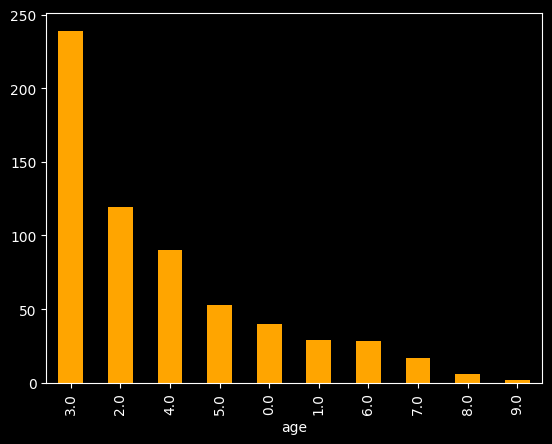

In [23]:
train_t.age.value_counts().plot.bar(color="orange")

In [30]:
disc = EqualWidthDiscretiser(bins=10,variables=["age","fare"])
disc.fit(X_train)
disc.binner_dict_

{'age': [-inf,
  8.603,
  16.536,
  24.469,
  32.402,
  40.335,
  48.268,
  56.201,
  64.134,
  72.067,
  inf],
 'fare': [-inf,
  51.23292,
  102.46584,
  153.69876,
  204.93168,
  256.1646,
  307.39752,
  358.63044,
  409.86336,
  461.09628,
  inf]}

<Axes: xlabel='age'>

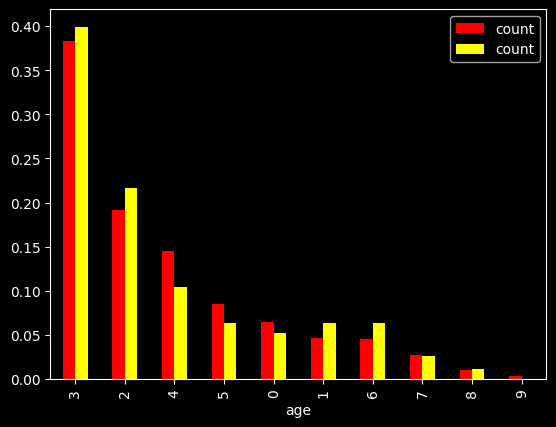

In [31]:
train_t = disc.transform(X_train)
test_t = disc.transform(X_test)

t1 = train_t["age"].value_counts() / len(X_train)
t2 = test_t["age"].value_counts() / len(X_test)

tmp = pd.concat([t1,t2],axis=1)
tmp.plot.bar(color=["red","yellow"])

In [67]:
disc = KBinsDiscretizer(n_bins=10,encode="onehot-dense",strategy="uniform").set_output(transform="pandas")

disc.fit(X_train[["age","fare"]])

KBinsDiscretizer(encode='onehot-dense', n_bins=10, strategy='uniform')

In [36]:
disc.bin_edges_

array([array([ 0.67 ,  8.603, 16.536, 24.469, 32.402, 40.335, 48.268, 56.201,
              64.134, 72.067, 80.   ])                                       ,
       array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
              307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ])          ],
      dtype=object)

In [39]:
disc.transform(X_train[["age","fare"]])

,age_0.0,age_1.0,age_2.0,age_3.0,age_4.0,age_5.0,age_6.0,age_7.0,age_8.0,age_9.0,fare_0.0,fare_1.0,fare_2.0,fare_3.0,fare_4.0,fare_5.0,fare_6.0,fare_7.0,fare_8.0,fare_9.0
857,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
386,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
578,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
629,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
559,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
disc= EqualWidthDiscretiser(bins=10,variables=["age","fare"],return_boundaries=True)
disc.fit(X_train)

EqualWidthDiscretiser(return_boundaries=True, variables=['age', 'fare'])

In [44]:
disc.transform(X_train)

,age,fare
857,"(48.268, 56.201]","(-inf, 51.233]"
52,"(48.268, 56.201]","(51.233, 102.466]"
386,"(-inf, 8.603]","(-inf, 51.233]"
124,"(48.268, 56.201]","(51.233, 102.466]"
578,"(24.469, 32.402]","(-inf, 51.233]"
...,...,...
835,"(32.402, 40.335]","(51.233, 102.466]"
192,"(16.536, 24.469]","(-inf, 51.233]"
629,"(24.469, 32.402]","(-inf, 51.233]"
559,"(32.402, 40.335]","(-inf, 51.233]"


In [45]:
tes2 = X_test.copy()

In [50]:
tes2.loc[495,"age"] = 100

In [51]:
tes2

,age,fare
495,100.000000,14.4583
648,29.915339,7.5500
278,7.000000,29.1250
31,29.915339,146.5208
255,29.000000,15.2458
...,...,...
263,40.000000,0.0000
718,29.915339,15.5000
620,27.000000,14.4542
786,18.000000,7.4958


In [57]:
disc.bin_edges_

array([array([ 0.67 ,  8.603, 16.536, 24.469, 32.402, 40.335, 48.268, 56.201,
              64.134, 72.067, 80.   ])                                       ,
       array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
              307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ])          ],
      dtype=object)

In [58]:
disc.transform(tes2)

,age,fare
495,9.0,0.0
648,3.0,0.0
278,0.0,0.0
31,3.0,2.0
255,3.0,0.0
...,...,...
263,4.0,0.0
718,3.0,0.0
620,3.0,0.0
786,2.0,0.0


In [60]:
tes2.loc[648,"age"]=1500

In [72]:
tes2

,age,fare
495,100.000000,14.4583
648,1500.000000,7.5500
278,7.000000,29.1250
31,29.915339,146.5208
255,29.000000,15.2458
...,...,...
263,40.000000,0.0000
718,29.915339,15.5000
620,27.000000,14.4542
786,18.000000,7.4958


In [74]:
disc.transform(tes2)

,age,fare
495,9.0,0.0
648,9.0,0.0
278,0.0,0.0
31,3.0,2.0
255,3.0,0.0
...,...,...
263,4.0,0.0
718,3.0,0.0
620,3.0,0.0
786,2.0,0.0


In [66]:
intervals

[0, 7, 14, 21, 28, 35, 42, 49, 56, 63, 70, 77, 84]

In [65]:
pd.cut(x=tes2["age"],bins=intervals,include_lowest=True)

495              NaN
648              NaN
278    (-0.001, 7.0]
31      (28.0, 35.0]
255     (28.0, 35.0]
           ...      
263     (35.0, 42.0]
718     (28.0, 35.0]
620     (21.0, 28.0]
786     (14.0, 21.0]
64      (28.0, 35.0]
Name: age, Length: 268, dtype: category
Categories (12, interval[float64, right]): [(-0.001, 7.0] < (7.0, 14.0] < (14.0, 21.0] < (21.0, 28.0] ... (56.0, 63.0] < (63.0, 70.0] < (70.0, 77.0] < (77.0, 84.0]]